In [1]:
import script_crawl as sc
import pandas as pd
import logging

In [2]:
url = 'https://www.imdb.com/chart/top'

In [3]:
try:
    df1 = sc.title_ratingExtract(url)
except Exception as Arugment:
    logging.exception('Unable to extract.Check URL')

C:\Users\ghxye\anaconda3\lib\site-packages\bs4\__init__.py:206: UserWarning: The "parseOnlyThese" argument to the BeautifulSoup constructor has been renamed to "parse_only."
  warnings.warn(
C:\Users\ghxye\Desktop\assessment\script_crawl.py:29: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 29 of the file C:\Users\ghxye\Desktop\assessment\script_crawl.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  souptd = bs(page, parseOnlyThese=SoupStrainer("td"))


In [4]:
# to fill in missing titles:
df1.at[58,'title'] = 'SunsetBlvd'
df1.at[81,'title'] = 'YourName'
df1.at[195,'title'] = 'SherlockJr'
df1.at[199,'title'] = 'MaryandMax'
df1.at[202,'title'] = 'MonstersInc'

In [6]:
casts = pd.concat([sc.casts(df1,i) for i in range(len(df1))], axis=0)
casts

,casts,title,year,genre,rating
0,Tim Robbins,TheShawshankRedemption,1994,Drama,9.2
1,Morgan Freeman,TheShawshankRedemption,1972,Drama,9.2
2,Bob Gunton,TheShawshankRedemption,2008,Drama,9.2
3,William Sadler,TheShawshankRedemption,1974,Drama,9.2
4,Clancy Brown,TheShawshankRedemption,1957,Drama,9.2
...,...,...,...,...,...
53,Linda Allen,DanceswithWolves,2000,Adventure,8.0
54,Bill Costner,DanceswithWolves,2012,Adventure,8.0
55,David Rambow,DanceswithWolves,1981,Adventure,8.0
56,William Rossman,DanceswithWolves,2008,Adventure,8.0


In [7]:
import pyodbc
import sqlalchemy
from sqlalchemy import create_engine

def toSQL(pandasDataFrame, sqlTableName, database, server):
    server_ = server
    database_ = database
    engine = create_engine('mssql+pyodbc://@' + server_ + '/' + database_ + 
                           '?trusted_connection=yes&driver=ODBC+Driver+17+for+SQL+Server')
    return pandasDataFrame.to_sql(sqlTableName, engine, if_exists='append')

In [8]:
toSQL(casts, 'actor_movie_rating', 'assessment', 'DESKTOP-JKPP20V\SQLEXPRESS')

In [19]:
import pandas as pd
#retrieve from DB
sqlserver='DESKTOP-JKPP20V\SQLEXPRESS'
db='assessment'
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}}; Server={sqlserver};DATABASE={db};'
                     f'Trusted_Connection=yes; autocommit=True')
query = f"""
        SELECT * FROM [dbo].[actor_movie_rating]
        """
x1 = pd.read_sql(query,conn).drop(['index','year'], axis=1)
x1

,casts,title,genre,rating
0,Tim Robbins,TheShawshankRedemption,Drama,9.2
1,Morgan Freeman,TheShawshankRedemption,Drama,9.2
2,Bob Gunton,TheShawshankRedemption,Drama,9.2
3,William Sadler,TheShawshankRedemption,Drama,9.2
4,Clancy Brown,TheShawshankRedemption,Drama,9.2
...,...,...,...,...
18780,Linda Allen,DanceswithWolves,Adventure,8.0
18781,Bill Costner,DanceswithWolves,Adventure,8.0
18782,David Rambow,DanceswithWolves,Adventure,8.0
18783,William Rossman,DanceswithWolves,Adventure,8.0


In [20]:
def assign(df,position,col):
    x = df.loc[df.title == df1.title[position]]
    x[col] = df1[col][position]
    return x

In [23]:
df1['revenue'] = [sc.revenue(df1['code'][i]) for i in range(len(df1))]
x1 = pd.concat([assign(x1,i,'year') for i in range(len(df1))])
x1 = pd.concat([assign(x1,i,'revenue') for i in range(len(df1))])
x1

<ipython-input-20-7fb0665d27df>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[col] = df1[col][position]


,casts,title,genre,rating,year,revenue
0,Tim Robbins,TheShawshankRedemption,Drama,9.2,1994,28884504
1,Morgan Freeman,TheShawshankRedemption,Drama,9.2,1994,28884504
2,Bob Gunton,TheShawshankRedemption,Drama,9.2,1994,28884504
3,William Sadler,TheShawshankRedemption,Drama,9.2,1994,28884504
4,Clancy Brown,TheShawshankRedemption,Drama,9.2,1994,28884504
...,...,...,...,...,...,...
18780,Linda Allen,DanceswithWolves,Adventure,8.0,1990,424208848
18781,Bill Costner,DanceswithWolves,Adventure,8.0,1990,424208848
18782,David Rambow,DanceswithWolves,Adventure,8.0,1990,424208848
18783,William Rossman,DanceswithWolves,Adventure,8.0,1990,424208848


In [24]:
#save to DB
toSQL(x1, 'movie_info', 'assessment', 'DESKTOP-JKPP20V\SQLEXPRESS')

## Analysis

In [3]:
import numpy as np
import pandas as pd

import pyodbc
import sqlalchemy
from sqlalchemy import create_engine

from scipy.stats import f_oneway

In [4]:
#retrieve from DB
sqlserver='DESKTOP-JKPP20V\SQLEXPRESS'
db='assessment'
conn = pyodbc.connect(f'DRIVER={{ODBC Driver 17 for SQL Server}}; Server={sqlserver};DATABASE={db};'
                     f'Trusted_Connection=yes; autocommit=True')
query_df1 = f"""
        SELECT * FROM [dbo].[movie_info]
        """
df1_read = pd.read_sql(query_df1,conn).drop(['index'], axis=1)
df1_read['rating'] = df1_read.rating.astype(float)
df1_read

,casts,title,genre,rating,year,revenue
0,Tim Robbins,TheShawshankRedemption,Drama,9.2,1994,28884504
1,Morgan Freeman,TheShawshankRedemption,Drama,9.2,1994,28884504
2,Bob Gunton,TheShawshankRedemption,Drama,9.2,1994,28884504
3,William Sadler,TheShawshankRedemption,Drama,9.2,1994,28884504
4,Clancy Brown,TheShawshankRedemption,Drama,9.2,1994,28884504
...,...,...,...,...,...,...
18780,Linda Allen,DanceswithWolves,Adventure,8.0,1990,424208848
18781,Bill Costner,DanceswithWolves,Adventure,8.0,1990,424208848
18782,David Rambow,DanceswithWolves,Adventure,8.0,1990,424208848
18783,William Rossman,DanceswithWolves,Adventure,8.0,1990,424208848


In [5]:
def hypothesisANOVA(groupbyCol,y_col,pVal):
    group = df1_read.groupby(groupbyCol)[y_col].apply(list)
    res = f_oneway(*group)
    if res.pvalue < pVal:
        print('P-Value is: ' + str(res.pvalue) + '. Reject Null-hypothesis')
    else:
        print('P-Value is: ' + str(res.pvalue) + '. Accept Null-hypothesis')

In [6]:
hypothesisANOVA('casts','revenue',0.05)

P-Value is: 2.3076882172026575e-95. Reject Null-hypothesis


<p>There is a correlation between casts and the revenue generated</p>

In [7]:
df1_read['revenueClass'] = pd.qcut(df1_read['revenue'],q=3,labels=['low','mid','high'])
df1_read

,casts,title,genre,rating,year,revenue,revenueClass
0,Tim Robbins,TheShawshankRedemption,Drama,9.2,1994,28884504,low
1,Morgan Freeman,TheShawshankRedemption,Drama,9.2,1994,28884504,low
2,Bob Gunton,TheShawshankRedemption,Drama,9.2,1994,28884504,low
3,William Sadler,TheShawshankRedemption,Drama,9.2,1994,28884504,low
4,Clancy Brown,TheShawshankRedemption,Drama,9.2,1994,28884504,low
...,...,...,...,...,...,...,...
18780,Linda Allen,DanceswithWolves,Adventure,8.0,1990,424208848,high
18781,Bill Costner,DanceswithWolves,Adventure,8.0,1990,424208848,high
18782,David Rambow,DanceswithWolves,Adventure,8.0,1990,424208848,high
18783,William Rossman,DanceswithWolves,Adventure,8.0,1990,424208848,high


In [8]:
list(filter(lambda x: x%2 == 0, df1_read.revenue))

[28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 28884504,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 250341816,
 2503

In [9]:
df1_read.groupby('revenueClass')['casts'].agg(pd.Series.mode)

revenueClass
low          Bess Flowers
mid         Arnold Montey
high    John Ratzenberger
Name: casts, dtype: object

<b><u>Conclusions</u></b>
<p>We see that John Ratzenberger is the top performing actor, since he is most frequently involved in top grossing movies</p>
<br>
<b><u>Problems</u></b>
<p>There is a need to acknowledge that movies that were too far back in history do not have revenue recorded. Hence, this comparison may not be a fully accurate assessment of the actor's performance of all time</p>

In [10]:
high = df1_read.loc[df1_read.revenueClass == 'high']
high = high.drop('casts',axis = 1)
high = high.drop_duplicates().reset_index().drop('index',axis=1)
high

,title,genre,rating,year,revenue,revenueClass
0,TheDarkKnight,Action,9.0,2008,1006234167,high
1,Schindler'sList,Biography,8.9,1993,322161245,high
2,TheLordoftheRings:TheReturnoftheKing,Action,8.9,2003,1146457748,high
3,TheLordoftheRings:TheFellowshipoftheRing,Action,8.8,2001,898204420,high
4,ForrestGump,Drama,8.8,1994,678226465,high
...,...,...,...,...,...,...
56,TheExorcist,Horror,8.0,1973,441306145,high
57,TheIncredibles,Animation,8.0,2004,631607053,high
58,PiratesoftheCaribbean:TheCurseoftheBlackPearl,Action,8.0,2003,654264015,high
59,Aladdin,Animation,8.0,1992,504050219,high


<AxesSubplot:xlabel='title', ylabel='revenue'>

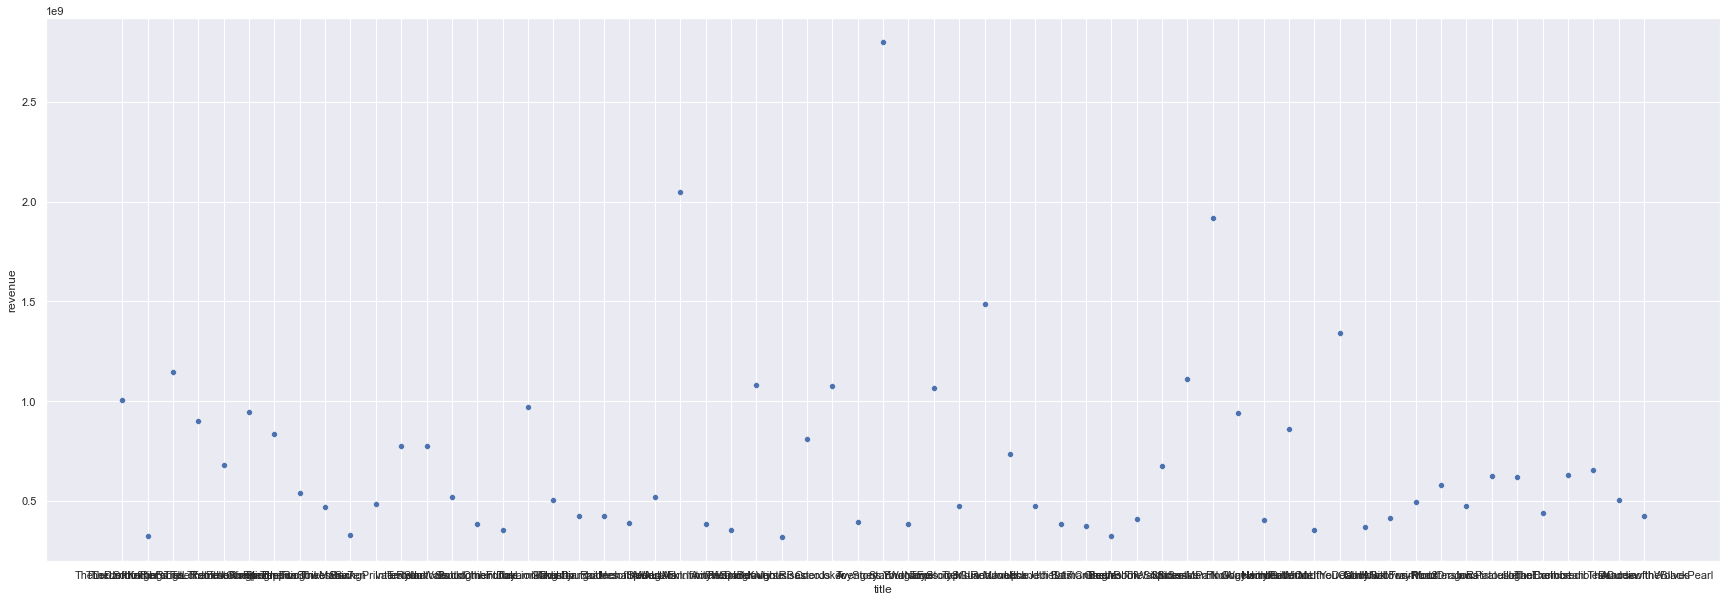

In [12]:
import seaborn as sns
sns.set(rc={'figure.figsize':(30,10)})
sns.scatterplot(x = 'title', y = 'revenue', data=high)